# Importing the required libraries

In [291]:
!pip install tensorflow --upgrade

In [292]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

# Load data

In [293]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

In [294]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [295]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

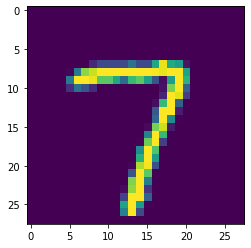

In [296]:
plt.imshow(x_train[5100])     #ploting the index=image

In [297]:
np.argmax(y_train[5100])

0

# Reshaping Dataset

In [298]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

# Applying One Hot Encoding

In [299]:
number_of_classes = 10  #storing the no of classes in a variable

In [300]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

# Add CNN Layers

In [301]:
#create model
model=Sequential ()

In [302]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [303]:
#flatten the dimension of the image
model.add(Flatten())

In [304]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

# Compiling the model

In [305]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [306]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

# Train the model

In [ ]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 110s 59ms/step - loss: 0.2436 - accuracy: 0.9503 - val_loss: 0.0826 - val_accuracy: 0.9750
Epoch 2/5
1676/1875 [=========================>....] - ETA: 11s - loss: 0.0712 - accuracy: 0.9778

# Observing the metrics

In [ ]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

# Test The Model

In [ ]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

In [ ]:
plt.imshow(x_test[6000])

In [ ]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

In [ ]:
np.argmax(y_test[6000:6001]) #printing the actual labels

# Save The model

In [ ]:
# Save the model
model.save('models/mnistCNN.h5')

In [ ]:
cd models

In [ ]:
!tar -zcvf hdr_deployment.tgz mnistCNN.h5

In [ ]:
ls -1

In [ ]:
!pip install watson-machine-learning-client --upgrade

# Cloud deploy

In [ ]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"RvAb9cKiUB6EXq6WFAolWKhfJ_6uiNhsXaWgo2ZuAqtn"
}
client = APIClient(credentials)
client

In [ ]:
client.spaces.get_details()

In [ ]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [ ]:
space_uid = "66a1a5b8-9ba4-46ac-b572-1e05cd33d5a5"
print("Space UID = " + space_uid)

In [ ]:
client.set.default_space(space_uid)

In [ ]:
client.software_specifications.list(limit=100)

In [ ]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

In [ ]:
model_details = client.repository.store_model(model='hdr_deployment.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Digit Recognition System",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [ ]:
model_details

In [ ]:
model_id = client.repository.get_model_id(model_details)
model_id

In [ ]:
client.repository.download(model_id,'DigitRecog_IBM_model.tar.gz')

In [ ]:
ls

# Test Model

In [ ]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [ ]:
model = load_model("mnistCNN.h5")

In [ ]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1rEQ4QsDyr45SbIYkkmEXGolFpDjMBjlc1KmxrsH2V1U',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'digitrecognition-donotdelete-pr-kvpefjqsoxebrc'
object_key = '4.jpg'

streaming_body_3 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']


In [ ]:
img = Image.open(streaming_body_3).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [ ]:
img

In [ ]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [ ]:
pred = model.predict(im2arr)
print(pred)

In [ ]:
print(np.argmax(pred, axis=1)) #printing our Labels